In [2]:
# chennai house price prediction:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [48]:
df=pd.read_csv("chennai houseing sale1.csv")
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [65]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [66]:
df.dropna(inplace=True)
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,0,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,1,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,0,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,1,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,0,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,1,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,0,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,1,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,0,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [67]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7056 non-null   object 
 1   AREA           7056 non-null   object 
 2   INT_SQFT       7056 non-null   int64  
 3   DATE_SALE      7056 non-null   object 
 4   DIST_MAINROAD  7056 non-null   int64  
 5   N_BEDROOM      7056 non-null   float64
 6   N_BATHROOM     7056 non-null   float64
 7   N_ROOM         7056 non-null   int64  
 8   SALE_COND      7056 non-null   object 
 9   PARK_FACIL     7056 non-null   object 
 10  DATE_BUILD     7056 non-null   object 
 11  BUILDTYPE      7056 non-null   object 
 12  UTILITY_AVAIL  7056 non-null   object 
 13  STREET         7056 non-null   object 
 14  MZZONE         7056 non-null   object 
 15  QS_ROOMS       7056 non-null   float64
 16  QS_BATHROOM    7056 non-null   float64
 17  QS_BEDROOM     7056 non-null   float64
 18  QS_OVERA

In [15]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03
mean,1381.316752,99.569161,1.636621,1.213152,3.686650,3.517177,3.505896,3.485332,3.503389,376791.852608,140994.273384,1.088801e+07
std,457.860850,57.403870,0.803633,0.409563,1.020011,0.892141,0.897644,0.886814,0.527313,143109.581793,78774.465963,3.769081e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272117.500000,84212.750000,8.266790e+06
50%,1369.500000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349444.500000,127640.500000,1.031922e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451030.500000,184449.000000,1.298148e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [68]:
# converting the boolean to numerical values:
from sklearn import preprocessing
lb=preprocessing.LabelBinarizer()

df.PARK_FACIL=lb.fit_transform(df.PARK_FACIL)
df.head(10)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,0,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,1,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,0,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,1,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,0,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
5,P00219,Chrompet,1220,11-09-2014,36,2.0,1.0,4,Partial,1,...,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,409027,198316,12394750
6,P09105,Chrompet,1167,05-04-2007,137,1.0,1.0,3,Partial,1,...,AllPub,No Access,RL,3.6,2.1,2.5,2.670,263152,33955,8488790
7,P09679,Velachery,1847,13-03-2006,176,3.0,2.0,5,Family,1,...,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,604809,235204,16800250
8,P03377,Chrompet,771,06-04-2011,175,1.0,1.0,2,AdjLand,1,...,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,257578,33236,8308970
9,P09623,Velachery,1635,22-06-2006,74,2.0,1.0,4,AbNormal,1,...,ELO,No Access,I,3.1,3.1,3.3,3.160,323346,121255,8083650


In [96]:
# assiging the dependent and independent variables:
independent_variables=["INT_SQFT","DIST_MAINROAD","N_BEDROOM","N_BATHROOM","N_ROOM","QS_ROOMS","QS_BATHROOM","QS_BEDROOM",
                       "QS_OVERALL","REG_FEE","COMMIS","PARK_FACIL"]
x=df[independent_variables]
x

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,PARK_FACIL
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,144400,0
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,304049,1
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,421094,92114,0
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,356321,77042,1
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,237000,74063,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,3.0,2.2,2.4,2.520,208767,107060,1
7105,1897,52,3.0,2.0,5,3.6,4.5,3.3,3.920,346191,205551,0
7106,1614,152,2.0,1.0,4,4.3,4.2,2.9,3.840,317354,167028,1
7107,787,40,1.0,1.0,2,4.6,3.8,4.1,4.160,425350,119098,0


In [97]:
y=df["SALES_PRICE"]
y

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: SALES_PRICE, Length: 7056, dtype: int64

In [93]:
# spliitting the values:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42,shuffle=True)

In [94]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [75]:
from sklearn.model_selection import cross_val_score

In [77]:
result=cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv=50)
result

array([-3.14781950e+12, -2.57520559e+12, -1.89257537e+12, -1.98593941e+12,
       -1.97927359e+12, -2.36573082e+12, -2.78531811e+12, -2.62199938e+12,
       -1.85950588e+12, -2.49379185e+12, -1.85533681e+12, -2.03819258e+12,
       -2.03256166e+12, -2.60629558e+12, -2.83281581e+12, -2.32750056e+12,
       -2.89924738e+12, -2.14186443e+12, -2.44536815e+12, -2.29346115e+12,
       -2.10028514e+12, -2.68866844e+12, -2.31664106e+12, -2.45250721e+12,
       -1.98281229e+12, -2.70008900e+12, -3.06089625e+12, -2.19741978e+12,
       -2.47163529e+12, -2.65450301e+12, -2.36108653e+12, -2.15611818e+12,
       -2.44960818e+12, -3.03199213e+12, -2.32875622e+12, -1.87516086e+12,
       -2.97750268e+12, -2.45367503e+12, -2.08122977e+12, -2.08614763e+12,
       -3.00394722e+12, -3.07329211e+12, -1.81207878e+12, -2.53838460e+12,
       -2.15601178e+12, -2.60760287e+12, -2.06157490e+12, -2.16291048e+12,
       -2.72020794e+12, -1.71938023e+12])

In [79]:
result.mean()

-2389238584635.2705

In [81]:
# predict the test value:
y_predict=model.predict(x_test)

In [90]:
# find the Accuracy score for the model:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print("MAE:",mean_absolute_error(y_test,y_predict))
print("MSE:",mean_squared_error(y_test,y_predict))
print("R2_score:",r2_score(y_test,y_predict))

MAE: 1220790.746577427
MSE: 2349197876253.8403
R2_score: 0.8371658427033195


In [102]:
# check the coorelation between variables:
corr=df.corr()
print(corr)

               INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM    N_ROOM  \
INT_SQFT       1.000000       0.002267   0.786721    0.517103  0.951305   
DIST_MAINROAD  0.002267       1.000000  -0.001938    0.002496  0.002313   
N_BEDROOM      0.786721      -0.001938   1.000000    0.756016  0.840654   
N_BATHROOM     0.517103       0.002496   0.756016    1.000000  0.570110   
N_ROOM         0.951305       0.002313   0.840654    0.570110  1.000000   
PARK_FACIL    -0.005014       0.009531   0.009559    0.014116  0.000861   
QS_ROOMS       0.020495       0.002739   0.015508    0.013487  0.016710   
QS_BATHROOM   -0.007249      -0.030999  -0.006461   -0.011091 -0.006636   
QS_BEDROOM     0.009643       0.001141   0.015810    0.012278  0.015618   
QS_OVERALL     0.013830      -0.017482   0.013932    0.007858  0.015234   
REG_FEE        0.658005       0.011144   0.456759    0.262570  0.631578   
COMMIS         0.571667       0.010203   0.431035    0.258199  0.534058   
SALES_PRICE    0.612668  

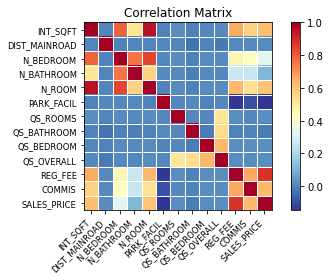

In [106]:
import statsmodels.api as sm

sm.graphics.plot_corr(corr,xnames=list(corr.columns))
plt.show()

In [114]:
# check any multicollinearity between the indenpendent_variables:
from statsmodels.stats.outliers_influence import variance_inflation_factor
threshold=10
for i in np.arange(0,len(independent_variables)):
    vif=[variance_inflation_factor(x[independent_variables].values, ix) for ix in range(x[independent_variables].shape[1])]
    maxloc=vif.index(max(vif))
    if max(vif)>threshold:
        print("vif :", vif)
        print('dropping \'' + x[independent_variables].columns[maxloc] + '\' at index: ' + str(maxloc))
        del independent_variables[maxloc]
    else:
        break

print('Final variables:', independent_variables)

Final variables: ['DIST_MAINROAD', 'N_BEDROOM', 'QS_BATHROOM', 'COMMIS', 'PARK_FACIL']


In [118]:
print(independent_variables)
x1=independent_variables
x1

['DIST_MAINROAD', 'N_BEDROOM', 'QS_BATHROOM', 'COMMIS', 'PARK_FACIL']


['DIST_MAINROAD', 'N_BEDROOM', 'QS_BATHROOM', 'COMMIS', 'PARK_FACIL']

In [109]:
sales_price=pd.DataFrame(data={"predicted_price":y_predict.flatten()})
print(sales_price)

      predicted_price
0        1.441100e+07
1        9.732452e+06
2        1.281308e+07
3        7.897097e+06
4        8.072154e+06
...               ...
2112     1.047937e+07
2113     1.205517e+07
2114     1.406908e+07
2115     1.345286e+07
2116     1.037392e+07

[2117 rows x 1 columns]
